In [2]:
#Defined class named Graph
class Graph:
  def __init__(self):
    self.nodes = {}
    self.edges = {}

  def add_node(self, name, data=None):
    if name in self.nodes and self.get_node_data(name)!='u':
        print(f"Node with name '{name}' already exists. Skipping..")
    else:
      self.nodes[name] = {'data': data}

  def add_edge(self, source, destination):
    if source not in self.nodes or destination not in self.nodes:
      raise ValueError("Source or destination node does not exist.")
    self.edges[(source, destination)] = None

  def get_node_data(self, name):
    if name not in self.nodes:
      return None
    return self.nodes[name]['data']

  def get_neighbors(self, node):
    neighbors = []
    for edge in self.edges:
      if edge[0] == node:
        neighbors.append(edge[1])
    return neighbors

  def delete_node(self, name):
    if name not in self.nodes:
      raise ValueError(f"Node '{name}' does not exist in the graph.")

    del self.nodes[name]

    edges_to_delete = []
    for edge in self.edges:
      if edge[0] == name or edge[1] == name:
        edges_to_delete.append(edge)
    for edge in edges_to_delete:
      del self.edges[edge]


  def __str__(self):
    output = "Nodes:\n"
    for name, data in self.nodes.items():
      output += f"- {name}: {data['data']}\n"
    output += "Edges:\n"
    for edge in self.edges:
      output += f"- {edge[0]} -> {edge[1]}\n"
    return output

In [3]:
#Importing important modules and libraries
import re                                     #re is used for Python Regular Expression and Pattern Matching
import matplotlib.pyplot as plt               #matplotlib.pyplot is used for visualizations and plots
import networkx as nx                         #networkx is used for creating nd manipulating networks and graphs

In [6]:
inputs=[]
outputs=[]
graph=Graph()
#Patterns set according to aspects of benchfile lines
p1 = r"([A-Z0-9]+)"
p2 = r"\ .*\("
p3 = r"\(.*\)"
filename=""                                               #variable to hold file name during selecting bench file
Type=''                                                   #variable to hold gate type of edge later on

print("1. s27.bench")
print("2. s208.bench")
print("3. test1.bench.txt")
op=int(input("Enter which bench file to evaulate:"))      #Bench files are uploaded into Colab Notebook Memory before runtime
if op==1:
  filename="s27.bench"
elif op==2:
  filename="s208.bench"
elif op==3:
  filename="test1.bench.txt"
with open(filename, "r") as f:
    lines = f.readlines()                                 #lines holds each line of code from bench file including comments

for line in lines:
    if line.startswith('#') or line.startswith('\n'):     #Check for comments and newlines in benchfile and skips them
        continue
    m1 = re.search(p1, line)                              #m1 stores the 'LHS' of equation line
    m2 = re.search(p2, line)                              #m2 stores the 'operands' with brackets
    m3 = re.search(p3, line)                              #m3 stores the 'operation' taking place with succeding bracket character
    wl=0                                                  #wl stands for word left, 0-> node, 1-> input, 2-> output
    if m1:
      key=m1.group(0)                                     #key stores whether line is input, output or other line of code in benchfile
      if (key=='INPUT'):
        wl=1
      elif (key=='OUTPUT'):
        wl=2
    if m2:
      g=m2.group(0)
      Type=g[3:-1]                                        #Type stores the gate type of key node if key is not input or output
      if wl==0:
        graph.add_node(key,Type)
    if m3:
      ent=m3.group(0)[1:-1]                               #ent stores the values to be fed into key
      #if not node
      if wl==2:                                           #if key is input then ent is node stored as input type
        outputs.append(ent)
      if wl==1:                                           #if key is input then ent is node stored as input type
        inputs.append(ent)
        graph.add_node(ent,'inp')
      #if node
      else:
        if ',' in ent:                                    #if ent is two values, the we split them and store both nodes
          se=ent.split(', ')
          for i in se:
            graph.add_node(i,'u')
            graph.add_edge(key,i)
        else:                                             #if ent is single value, we directly store as node
          if wl!=2:
            graph.add_node(ent,'u')
            graph.add_edge(key,ent)

if ((((len(list(graph.nodes)))-len(inputs))%2)!=0):                     #if odd number of nodes, then we add a dummy node for future operation
  graph.add_node('D','D')
for i in inputs:
  graph.delete_node(i)
print(graph)
print('Inputs:',inputs)
print('Outputs:',outputs)

1. s27.bench
2. s208.bench
3. test1.bench.txt
Enter which bench file to evaulate:1
Node with name 'G0' already exists. Skipping..
Node with name 'G14' already exists. Skipping..
Node with name 'G6' already exists. Skipping..
Node with name 'G8' already exists. Skipping..
Node with name 'G3' already exists. Skipping..
Node with name 'G8' already exists. Skipping..
Node with name 'G16' already exists. Skipping..
Node with name 'G15' already exists. Skipping..
Node with name 'G14' already exists. Skipping..
Node with name 'G5' already exists. Skipping..
Node with name 'G9' already exists. Skipping..
Node with name 'G1' already exists. Skipping..
Node with name 'G7' already exists. Skipping..
Node with name 'G2' already exists. Skipping..
Node with name 'G12' already exists. Skipping..
Nodes:
- G5: DFF
- G10: NOR
- G6: DFF
- G11: NOR
- G7: DFF
- G13: NOR
- G14: NOT
- G17: NOT
- G8: AND
- G15: OR
- G12: NOR
- G16: OR
- G9: NAND
- D: D
Edges:
- G5 -> G10
- G6 -> G11
- G7 -> G13
- G17 -> G11


In [8]:
#This is section is for beautifying graph and adding color, size and weight for each node type
colors={}
sizes={}
for x,y in graph.nodes.items():
  if y['data']=='NOT':
    colors[x]='lightblue'
    sizes[x]=100
  elif y['data']=='NAND':
    colors[x]='yellow'
    sizes[x]=200
  elif y['data']=='NOR':
    colors[x]='orange'
    sizes[x]=200
  elif y['data']=='AND':
    colors[x]='pink'
    sizes[x]=150
  elif y['data']=='OR':
    colors[x]='plum'
    sizes[x]=150
  elif y['data']=='XOR':
    colors[x]='indigo'
    sizes[x]=300
  elif y['data']=='DFF':
    colors[x]='grey'
    sizes[x]=500
  else:                                             #for dummy node
    colors[x]='bisque'
    sizes[x]=100
edges_with_weights=[]
edge_weights={}
for a,b in list(graph.edges.keys()):
  weight=int((sizes[a])/100)
  edges_with_weights.append((a,b,weight))
  edge_weights[(a,b)]=weight                        #weights for each edge proportional to size of start node to visualize delay by node
print(edges_with_weights)

[('G5', 'G10', 5), ('G6', 'G11', 5), ('G7', 'G13', 5), ('G17', 'G11', 1), ('G8', 'G14', 1), ('G8', 'G6', 1), ('G15', 'G12', 1), ('G15', 'G8', 1), ('G16', 'G8', 1), ('G9', 'G16', 2), ('G9', 'G15', 2), ('G10', 'G14', 2), ('G10', 'G11', 2), ('G11', 'G5', 2), ('G11', 'G9', 2), ('G12', 'G7', 2), ('G13', 'G12', 2)]


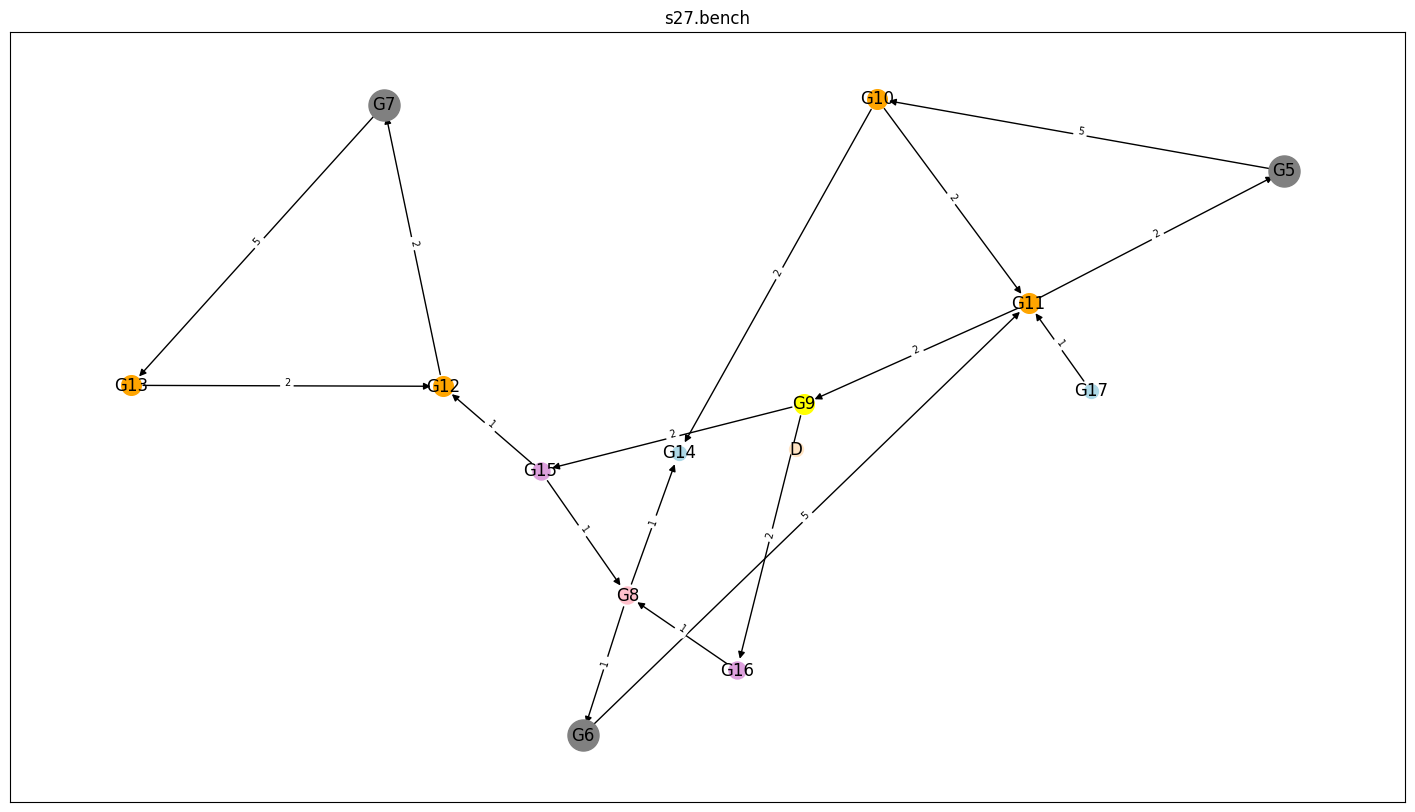

In [9]:
G = nx.DiGraph()                                                                                   #Creating a directed graph
G.add_nodes_from(list(graph.nodes))
G.add_weighted_edges_from(edges_with_weights)
plt.figure(figsize =(18, 10))
pos = nx.kamada_kawai_layout(G)                                                                     #layout to help visulaize with less clutter
node_colors = list(colors.values())
node_sizes = list(sizes.values())
for node in G.nodes:
  nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=sizes[node], node_color=colors[node])   #Incorporating nodes
  nx.draw_networkx_labels(G, pos, labels={node:node})
nx.draw_networkx_edges(G, pos, arrows=True)                                                         #Drawing edges
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, verticalalignment='baseline', font_size=7)
plt.title(filename)
plt.show()

In [ ]:
#For Adjacency Matrix
print('The nodes are',G.nodes())
nodes=list(G.nodes())
num_nodes = G.number_of_nodes()
ind={}                                                            #The ind dictionary is for storing indices to help with translation
i=0
for node in G.nodes:
  ind[node]=i
  i+=1
print('Indices:',ind)
adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
# Loop through edges and update the matrix
for eg in edges_with_weights:
  source, target, weight = eg
  adjacency_matrix[ind[source], ind[target]] = weight
print("Adjacency Matrix:")
print(adjacency_matrix)

In [ ]:
#Finding start element
print('The outputs are:')
for o in range(len(outputs)):
  print(o+1,'-',outputs[o])
sp=int(input('Enter which output to refer:'))
if (sp-1)<len(outputs):
  fp=ind[outputs[sp-1]]
else:
  fp=ind[outputs[-1]]
print('fp=',fp)

In [10]:
#Shortest Path Algorithm
from heapq import heappop, heappush
INF = 10000                                                     #Assigned an infinity for the sake of algorithm
def Djikstra(mat, start):                                       #Djikstra Algorithm Func with priority queue
  for i in range(len(mat)):                                     #Replacing 0s with INF to symbolise no edge in algorithm
    for j in range(len(mat)):
      if mat[i][j]==0:
        mat[i][j]=INF
  dist=[INF]*len(mat)
  dist[start]=0
  predecessor = {num: None for num in range(len(mat))}
  pri_q=[(0,start),]
  i=0
  while pri_q:
    current_distance, current_vertex = heappop(pri_q)
    if current_distance > dist[current_vertex]:
      continue
    for neighbour in range(len(mat[current_vertex])):
      if mat[current_vertex][neighbour] != INF:
        t=current_distance + mat[current_vertex][neighbour]
        if t < dist[neighbour]:
          dist[neighbour] = t
          predecessor[neighbour] = current_vertex
          heappush(pri_q,(t,neighbour))
  for i in range(len(mat)):
    for j in range(len(mat)):
      if mat[i][j]==INF:
        mat[i][j]=0
  return dist, predecessor
def Path(start,end):                                            #Path function to help reconstruct the shortest path for each node
  current=start
  while True:
    if current==end:
      print(nodes[end])
      break
    print(nodes[current],'-> ',end='')
    current=pred[current]
start=fp                                                        #start value corresponding to G17 with regards to s27.bench, will change
sd,pred=Djikstra(adjacency_matrix,start)
print('The array for shortest distances: ',sd)
for i in range(len(sd)):                                        #Iterate through the sd array and Path function
  if sd[i]==INF:
    print('Vertex',nodes[i],'cannot be reached')
  else:
    print('Vertex',nodes[i],'has dist of ',sd[i],'==> ',end='')
    Path(i,start)